# US Accidents Data Analysis 2016-2023

This is a countrywide car accident dataset that covers 49 states of the USA. The accident data were collected from February 2016 to March 2023, using multiple APIs that provide streaming traffic incident (or event) data. These APIs broadcast traffic data captured by various entities, including the US and state departments of transportation, law enforcement agencies, traffic cameras, and traffic sensors within the road networks.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, mean_squared_error
import warnings
import warnings
warnings.simplefilter('ignore')
elec_type_colors = ['blue', 'green']  # Change to any desired colors
cmap = 'plasma'

In [2]:
df = pd.read_csv("./data/US_Accidents_March23.csv")
df.head(3)

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day


In [3]:
df.drop(columns=["End_Time","End_Lat", "End_Lng"], inplace= True)

In [4]:
df.dropna(inplace=True)
df.isnull().sum().sum()

np.int64(0)

In [5]:
df.shape

(5208003, 43)

In [6]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'Start_Lat', 'Start_Lng',
       'Distance(mi)', 'Description', 'Street', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

### DF Columns
Severity, Start_Time, Start_Lat, Start_Lng, Distance(mi), Description, Street, City, County, State, Zipcode, Country, 
 Timezone, Airport_Code, Weather_Timestamp, Temperature(F),Wind_Chill(F), Humidity(%), Pressure(in), Visibility(mi),Wind_Direction, Wind_Speed(mph), Precipitation(in),Weather_Condition, Amenity, Bump, Crossing, Give_Way, Junction,No_Exit, Railway, Roundabout, Station, Stop, Traffic_Calming,
 Traffic_Signal, Turning_Loop, Sunrise_Sunset, Civil_Twilight, Nautical_Twilight, Astronomical_Twilight

### df_eda

Severity, State, Start_Time, Start_Lat, Start_Lng, Year, Months, Amenity, Bump, Crossing, Give_Way, Junction, No_Exit,  Railway, Roundabout, Station, Stop, Traffic_Calming, Traffic_Signal, Turning_Loop

### df_data_handling

Temperature(F),Wind_Chill(F), Humidity(%), Pressure(in), Visibility(mi),Wind_Direction, Wind_Speed(mph), Precipitation(in),Weather_Condition, Severity

In [7]:
df.describe()

,Severity,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,5.208003e+06,5.208003e+06,5.208003e+06,5.208003e+06,5.208003e+06,5.208003e+06,5.208003e+06,5.208003e+06,5.208003e+06,5.208003e+06,5.208003e+06
mean,2.147938e+00,3.616199e+01,-9.415568e+01,6.619877e-01,6.134877e+01,6.002668e+01,6.492046e+01,2.935769e+01,9.016998e+00,7.376984e+00,6.108718e-03
std,4.446306e-01,5.193297e+00,1.734129e+01,1.842545e+00,1.920820e+01,2.146167e+01,2.280444e+01,1.100592e+00,2.625947e+00,5.510896e+00,6.035688e-02
min,1.000000e+00,2.455480e+01,-1.245481e+02,0.000000e+00,-4.500000e+01,-6.300000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.329193e+01,-1.171154e+02,0.000000e+00,4.800000e+01,4.700000e+01,4.800000e+01,2.918000e+01,1.000000e+01,3.000000e+00,0.000000e+00
50%,2.000000e+00,3.583557e+01,-8.678144e+01,9.600000e-02,6.400000e+01,6.400000e+01,6.700000e+01,2.968000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.013500e+01,-8.028513e+01,6.350000e-01,7.600000e+01,7.600000e+01,8.400000e+01,2.995000e+01,1.000000e+01,1.000000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.748413e+01,4.417500e+02,1.960000e+02,1.960000e+02,1.000000e+02,5.863000e+01,1.000000e+02,1.087000e+03,3.647000e+01


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5208003 entries, 5 to 7728393
Data columns (total 43 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   Distance(mi)           float64
 7   Description            object 
 8   Street                 object 
 9   City                   object 
 10  County                 object 
 11  State                  object 
 12  Zipcode                object 
 13  Country                object 
 14  Timezone               object 
 15  Airport_Code           object 
 16  Weather_Timestamp      object 
 17  Temperature(F)         float64
 18  Wind_Chill(F)          float64
 19  Humidity(%)            float64
 20  Pressure(in)           float64
 21  Visibility(mi)         float64
 22  Wind_Direction         

# Exploratory Data Analysis!

### Total Number of Accidents!

In [9]:
total_number_of_accidents = len(df["ID"].value_counts())
print(f'Total Number of accidents that took place between 2016 and 2023 in US are {total_number_of_accidents}.')

Total Number of accidents that took place between 2016 and 2023 in US are 5208003.


Creating a new Dataset for EDA!

In [10]:
df["Start_Time"] = pd.to_datetime(df['Start_Time'], errors='coerce')
df.dropna(subset=["Start_Time"], inplace=True)
df['Year'] = df['Start_Time'].dt.year

In [11]:
df_eda = df[["Severity", "State", "Start_Time", "Start_Lat", "Start_Lng", "Year", "Amenity", "Bump", "Crossing", "Give_Way", "Junction", "No_Exit",  "Railway", "Roundabout", "Station", "Stop", "Traffic_Calming", "Traffic_Signal", "Turning_Loop"]]

In [12]:
df_eda.head(3)

,Severity,State,Start_Time,Start_Lat,Start_Lng,Year,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop
5,3,OH,2016-02-08 07:44:26,40.100590,-82.925194,2016,False,False,False,False,False,False,False,False,False,False,False,False,False
9,3,OH,2016-02-08 08:10:04,40.100590,-82.925194,2016,False,False,False,False,False,False,False,False,False,False,False,False,False
11,3,OH,2016-02-08 08:21:27,39.932709,-82.830910,2016,False,False,False,False,False,False,False,False,False,False,False,False,False


In [13]:
df_eda.isnull().sum()

Severity           0
State              0
Start_Time         0
Start_Lat          0
Start_Lng          0
Year               0
Amenity            0
Bump               0
Crossing           0
Give_Way           0
Junction           0
No_Exit            0
Railway            0
Roundabout         0
Station            0
Stop               0
Traffic_Calming    0
Traffic_Signal     0
Turning_Loop       0
dtype: int64

### Number of Accidents Depending on Severity Level:

In [14]:
df['Severity'].value_counts().to_frame().style.bar(cmap=cmap)

,count
Severity,
2,3765605
3,583095
4,107099
1,61920


In [15]:
print("Most Accidents have severity level of 2.") 

Most Accidents have severity level of 2.


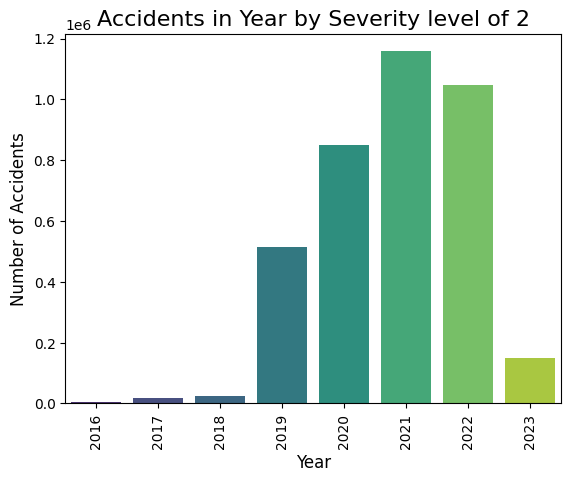

In [16]:
severity = 2
df_severity = df_eda[df_eda['Severity'] == severity]

# Aggregate accident counts by state
Severity_accidents = df_severity.groupby('Year').size().reset_index(name='Accident_Count')

# Set up the seaborn style
# sns.set(style="whitegrid")

# Create the bar plot
# plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='Accident_Count', data=Severity_accidents, palette='viridis')

# Customize the plot
plt.title(f'Accidents in Year by Severity level of {severity}', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.tick_params(axis='x', rotation=90)  # Rotate the x-axis labels for readability

# Display the plot
# plt.tight_layout()  # Adjust layout to fit everything
plt.show()

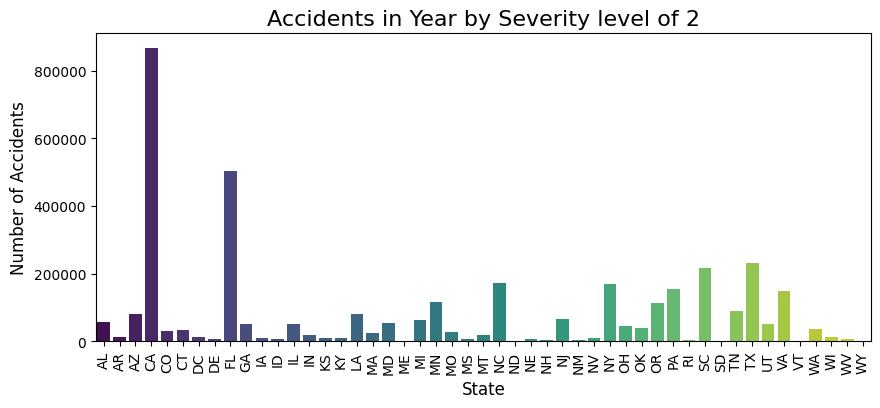

In [17]:
severity = 2
df_severity = df_eda[df_eda['Severity'] == severity]

# Aggregate accident counts by state
Severity_accidents = df_severity.groupby('State').size().reset_index(name='Accident_Count')

# Set up the seaborn style
# sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(10, 4))
sns.barplot(x='State', y='Accident_Count', data=Severity_accidents, palette='viridis')

# Customize the plot
plt.title(f'Accidents in Year by Severity level of {severity}', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.tick_params(axis='x', rotation=90)  # Rotate the x-axis labels for readability

# Display the plot
# plt.tight_layout()  # Adjust layout to fit everything
plt.show()

In [18]:
df['Year'].value_counts().to_frame().style.bar(cmap=cmap)

,count
Year,
2021,1322250
2022,1183172
2020,1077316
2019,703448
2023,154669
2018,40470
2017,26843
2016,9551


In [19]:
# print("Most no. of Accidents took place in the year 2021 and 2022. And Least no. of Accident took place in the year 2016 and 2023.") 

### Number of Accidents that took place in Each State in the Selected Period(2016-2023):

In [20]:
df['State'].value_counts().to_frame().style.bar(cmap=cmap)

,count
State,
CA,963574
FL,562560
TX,293367
SC,242845
NY,209241
NC,199562
VA,187085
PA,182272
MN,130220


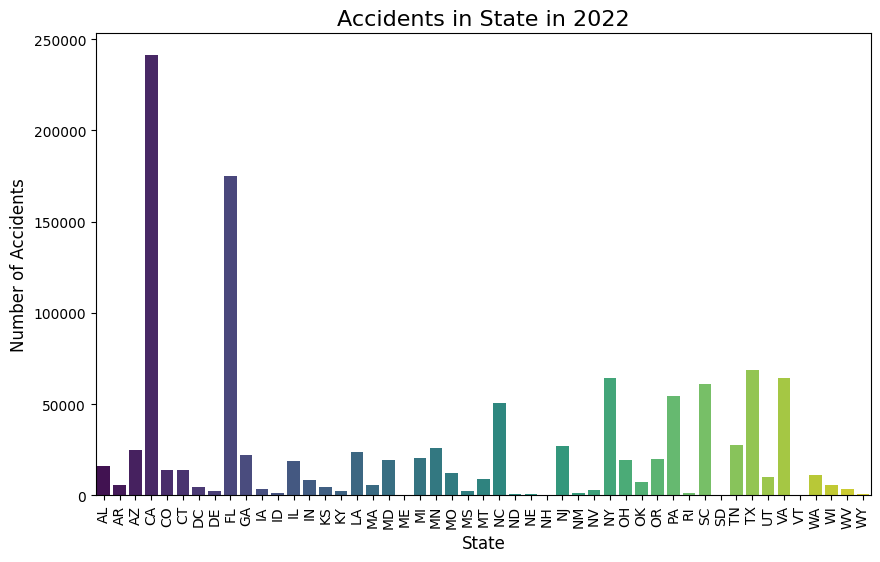

In [21]:
year =2022
df_year = df[df['Year'] == year]

# Aggregate accident counts by state
state_accidents = df_year.groupby('State').size().reset_index(name='Accident_Count')

plt.figure(figsize=(10, 6))
sns.barplot(x='State', y='Accident_Count', data=state_accidents, palette='viridis')

# Customize the plot
plt.title(f'Accidents in State in {year}', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.tick_params(axis='x', rotation=90)
plt.show()

### Number of Accidents that took in the Selected Period (2016-2023) at Different Places:

In [22]:
bool_columns = [
    "Amenity",
    "Bump",
    "Crossing",
    "Give_Way",
    "Junction",
    "No_Exit",
    "Railway",
    "Roundabout",
    "Station",
    "Stop",
    "Traffic_Calming",
    "Traffic_Signal",
    "Turning_Loop",
]


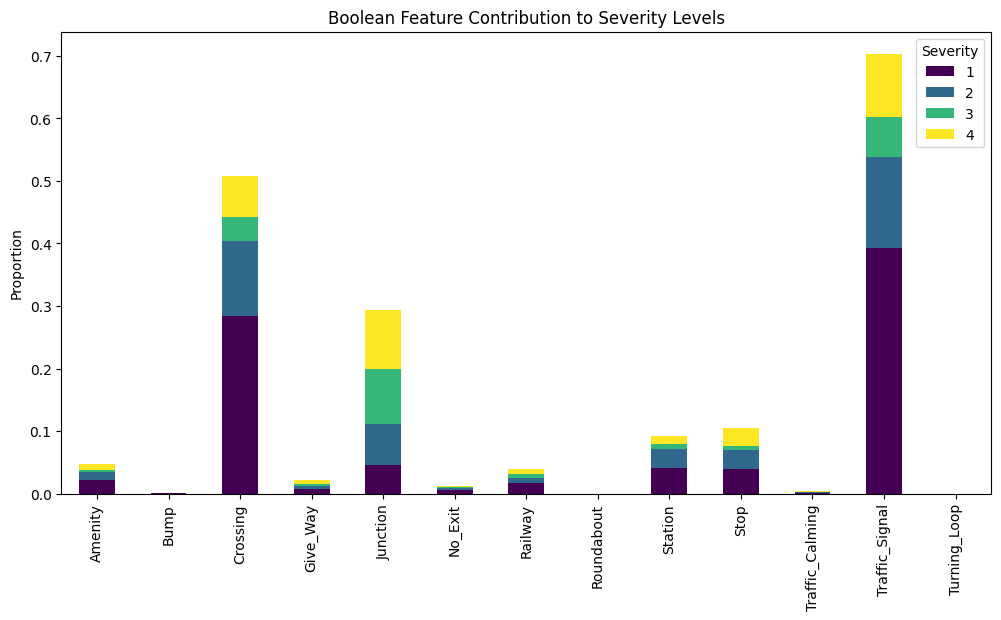

In [23]:
severity_bool_analysis = df.groupby("Severity")[bool_columns].mean()

severity_bool_analysis.T.plot(kind="bar", figsize=(12, 6), stacked=True, colormap="viridis")
plt.title("Boolean Feature Contribution to Severity Levels")
plt.ylabel("Proportion")
plt.show()

### The number of Accidents that took place for a particular state in a particular year!

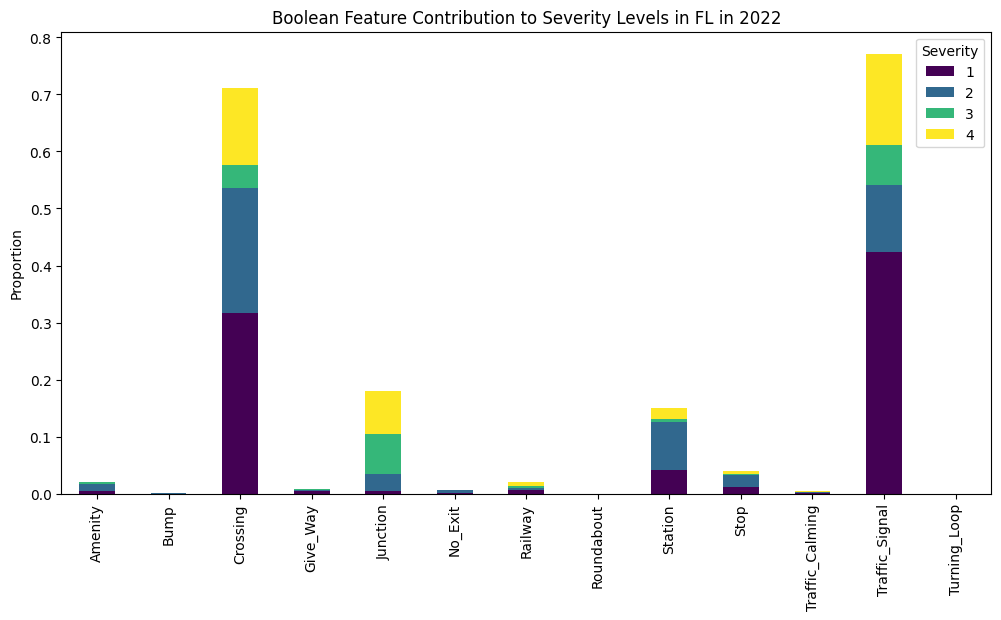

In [24]:
state = "FL"
year = 2022
df_selected_state_year = df[df["State"]==state][df["Year"]==year]

severity_bool_analysis = df_selected_state_year.groupby("Severity")[bool_columns].mean()

severity_bool_analysis.T.plot(
    kind="bar", figsize=(12, 6), stacked=True, colormap="viridis"
)
plt.title(f"Boolean Feature Contribution to Severity Levels in {state} in {year}")
plt.ylabel("Proportion")
plt.show()

In [25]:
df_selected_state_year.head(3)

,ID,Source,Severity,Start_Time,Start_Lat,Start_Lng,Distance(mi),Description,Street,City,...,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Year
512238,A-512252,Source2,3,2022-09-08 06:35:30,26.410135,-80.089828,0.0,Three lanes blocked due to crash on I-95 North...,I-95,Boca Raton,...,False,False,False,False,False,Night,Night,Day,Day,2022
512239,A-512253,Source2,2,2022-09-08 06:49:20,27.937590,-82.121178,0.0,Lane blocked due to crash on FL-60 at FL-39 Ja...,J L Redman Pkwy,Plant City,...,False,False,False,True,False,Night,Day,Day,Day,2022
512244,A-512258,Source2,1,2022-09-08 06:18:45,26.616896,-81.714752,0.0,Crash on CR-884 Lee Blvd at Gunnery Rd.,Lee Blvd,Lehigh Acres,...,False,False,False,True,False,Night,Night,Day,Day,2022


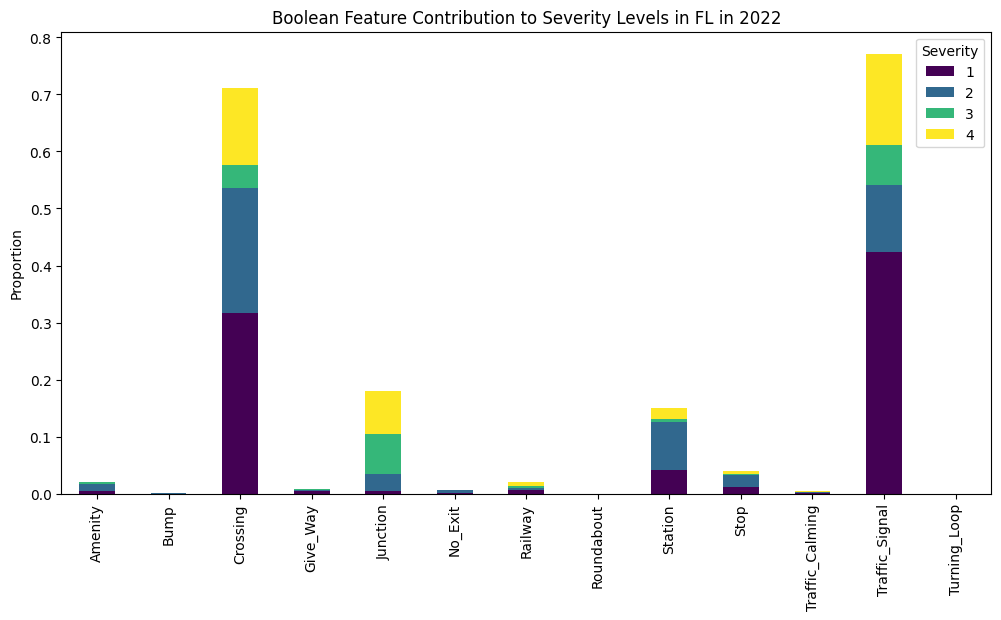

In [26]:
severity_bool_analysis = df_selected_state_year.groupby("Severity")[bool_columns].mean()

severity_bool_analysis.T.plot(
    kind="bar", figsize=(12, 6), stacked=True, colormap="viridis"
)
plt.title(f"Boolean Feature Contribution to Severity Levels in {state} in {year}")
plt.ylabel("Proportion")
plt.show()

In [27]:
# Filter data with valid latitude and longitude
# geo_data = df_eda[['Start_Lat', 'Start_Lng']].dropna()
# map_center = [geo_data['Start_Lat'].mean(), geo_data['Start_Lng'].mean()]
# heatmap = folium.Map(location=map_center, zoom_start=6)
# HeatMap(geo_data.values).add_to(heatmap)
# heatmap.save("heatmap.html")


# Data Preprocessing:
• Identifying and Handling Missing Values (done)

• Label Encoding (done)

• Outlier Detection and Removal

• Feature Scaling (Standardization and Normalization)

• Handling Duplicate Data (done)

• Data Type Transformation (done)

In [103]:
sampled_df = df.sample(n=50000, random_state=42)
# sampled_df.drop(columns= ["Precipitation(in)", "Visibility(mi)"])

In [104]:
df_data_handling = sampled_df[["Distance(mi)","Temperature(F)","Humidity(%)", "Pressure(in)", "Visibility(mi)","Wind_Direction", "Wind_Speed(mph)","Weather_Condition","Precipitation(in)", "Severity"]]

In [105]:
df_data_handling.duplicated()
df_data_handling = df_data_handling.drop_duplicates()

In [106]:
missing_values = df_data_handling.isnull().sum()

In [107]:
missing_values.sort_values(ascending=False)

Distance(mi)         0
Temperature(F)       0
Humidity(%)          0
Pressure(in)         0
Visibility(mi)       0
Wind_Direction       0
Wind_Speed(mph)      0
Weather_Condition    0
Precipitation(in)    0
Severity             0
dtype: int64

In [108]:
df_data_handling.head(3)

,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Weather_Condition,Precipitation(in),Severity
6956031,1.009,48.0,86.0,29.11,10.0,NNW,14.0,Cloudy,0.0,4
888616,0.000,70.0,87.0,29.85,10.0,S,7.0,Cloudy,0.0,3
6776186,0.055,58.0,36.0,29.40,10.0,NNW,5.0,Fair,0.0,2


### Missing Values Handled!

In [109]:
la = LabelEncoder()
la.fit(df_data_handling["Wind_Direction"])

LabelEncoder()

In [110]:
df_data_handling["Wind_Direction_numerical"] = la.transform(df_data_handling["Wind_Direction"])

In [111]:
la.fit(df_data_handling["Weather_Condition"])

LabelEncoder()

In [112]:
df_data_handling["Weather_Condition_numerical"] = la.transform(df_data_handling["Weather_Condition"])

### Encoding of Categorical Data Columns Done!

In [113]:
df_data_handling.head(3)

,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Weather_Condition,Precipitation(in),Severity,Wind_Direction_numerical,Weather_Condition_numerical
6956031,1.009,48.0,86.0,29.11,10.0,NNW,14.0,Cloudy,0.0,4,8,4
888616,0.000,70.0,87.0,29.85,10.0,S,7.0,Cloudy,0.0,3,11,4
6776186,0.055,58.0,36.0,29.40,10.0,NNW,5.0,Fair,0.0,2,8,8


In [102]:
df_data_handling["Weather_Condition"].unique()

array([ 4,  8, 29, 40, 44, 10, 14, 47, 32, 17, 33, 55, 56, 64, 43, 59, 26,
       24, 61, 50, 66, 19,  6, 39, 54, 46, 21, 12, 36, 51, 27, 38, 49, 52,
        7,  3,  1, 58,  0, 53, 42, 16, 31, 65, 23, 13])

In [116]:
df_weather_cond_Num = df_data_handling[["Weather_Condition","Weather_Condition_numerical"]]
df_wind_dir_Num = df_data_handling[["Wind_Direction","Wind_Direction_numerical"]]

In [117]:
df_weather_cond_Num.head(3)

,Weather_Condition,Weather_Condition_numerical
6956031,Cloudy,4
888616,Cloudy,4
6776186,Fair,8


['Cloudy', 'Fair', 'Partly Cloudy', 'Light Rain', 'Mostly Cloudy',
        'Fair / Windy', 'Fog', 'Haze', 'Rain', 'Light Rain with Thunder',
        'Heavy Rain', 'Light Snow', 'Cloudy / Windy', 'Smoke', 'Snow',
        'Thunder in the Vicinity', 'Overcast', 'Light Rain / Windy',
        'T-Storm', 'Mostly Cloudy / Windy', 'Light Freezing Drizzle',
        'Partly Cloudy / Windy', 'Light Drizzle', 'Light Snow / Windy',
        'Thunder', 'Heavy Rain / Windy', 'Scattered Clouds',
        'Thunder / Windy', 'Wintry Mix', 'Heavy Snow', 'Drizzle', 'Mist',
        'Small Hail', 'Patches of Fog', 'Heavy T-Storm',
        'Light Snow and Sleet / Windy', 'Freezing Rain',
        'Light Snow and Sleet', 'Showers in the Vicinity', 'Shallow Fog',
        'Light Freezing Rain', 'Snow / Windy',
        'Light Thunderstorms and Rain', 'Haze / Windy', 'Blowing Snow',
        'Heavy Snow / Windy', 'Sand / Dust Whirlwinds', 'T-Storm / Windy',
        'Heavy T-Storm / Windy', 'Light Drizzle / Windy',
        'N/A Precipitation', 'Rain / Windy', 'Drizzle and Fog',
        'Light Snow Shower', 'Clear', 'Snow and Sleet', 'Fog / Windy',
        'Blowing Dust', 'Blowing Snow / Windy', 'Sleet',
        'Wintry Mix / Windy', 'Heavy Drizzle', 'Thunder and Hail / Windy',
        'Light Freezing Rain / Windy', 'Light Rain Shower',
        'Thunderstorms and Rain', 'Heavy Thunderstorms and Rain', 'Hail']

[ 4,  8, 44, 29, 40,  9, 10, 14, 47, 32, 17, 33,  5, 55, 56, 64, 43,
        30, 59, 41, 26, 45, 24, 34, 61, 18, 50, 62, 66, 19,  6, 39, 54, 46,
        21, 37, 12, 36, 52, 51, 27, 57, 38, 15,  1, 20, 49, 60, 22, 25, 42,
        48,  7, 35,  3, 58, 11,  0,  2, 53, 67, 16, 63, 28, 31, 65, 23, 13]


In [122]:
df_weather_cond_Num["Weather_Condition"].unique(), df_weather_cond_Num["Weather_Condition_numerical"].unique()

(array(['Cloudy', 'Fair', 'Partly Cloudy', 'Light Rain', 'Mostly Cloudy',
        'Fair / Windy', 'Fog', 'Haze', 'Rain', 'Light Rain with Thunder',
        'Heavy Rain', 'Light Snow', 'Cloudy / Windy', 'Smoke', 'Snow',
        'Thunder in the Vicinity', 'Overcast', 'Light Rain / Windy',
        'T-Storm', 'Mostly Cloudy / Windy', 'Light Freezing Drizzle',
        'Partly Cloudy / Windy', 'Light Drizzle', 'Light Snow / Windy',
        'Thunder', 'Heavy Rain / Windy', 'Scattered Clouds',
        'Thunder / Windy', 'Wintry Mix', 'Heavy Snow', 'Drizzle', 'Mist',
        'Small Hail', 'Patches of Fog', 'Heavy T-Storm',
        'Light Snow and Sleet / Windy', 'Freezing Rain',
        'Light Snow and Sleet', 'Showers in the Vicinity', 'Shallow Fog',
        'Light Freezing Rain', 'Snow / Windy',
        'Light Thunderstorms and Rain', 'Haze / Windy', 'Blowing Snow',
        'Heavy Snow / Windy', 'Sand / Dust Whirlwinds', 'T-Storm / Windy',
        'Heavy T-Storm / Windy', 'Light Drizzle / Win

['NNW', 'S', 'CALM', 'SSW', 'E', 'SW', 'ENE', 'ESE', 'WSW', 'NW',
        'SSE', 'WNW', 'NE', 'W', 'N', 'SE', 'VAR', 'NNE', 'Variable',
        'North', 'West', 'East', 'South']

[ 8, 11,  0, 14,  1, 15,  2,  3, 21,  9, 13, 20,  6, 19,  5, 12, 17,
         7, 18, 10, 22,  4, 16]

In [123]:
df_wind_dir_Num["Wind_Direction"].unique(), df_wind_dir_Num["Wind_Direction_numerical"].unique()

(array(['NNW', 'S', 'CALM', 'SSW', 'E', 'SW', 'ENE', 'ESE', 'WSW', 'NW',
        'SSE', 'WNW', 'NE', 'W', 'N', 'SE', 'VAR', 'NNE', 'Variable',
        'North', 'West', 'East', 'South'], dtype=object),
 array([ 8, 11,  0, 14,  1, 15,  2,  3, 21,  9, 13, 20,  6, 19,  5, 12, 17,
         7, 18, 10, 22,  4, 16]))

In [118]:
df_wind_dir_Num.head(3)

,Wind_Direction,Wind_Direction_numerical
6956031,NNW,8
888616,S,11
6776186,NNW,8


In [39]:
df_data_handling.corr()

,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Weather_Condition,Precipitation(in),Severity
Distance(mi),1.000000,-0.037833,0.006184,-0.048171,-0.026073,0.003092,0.015547,0.007344,0.001268,0.026706
Temperature(F),-0.037833,1.000000,-0.343372,0.128958,0.262750,0.086020,0.041949,0.064564,-0.013011,-0.023664
Humidity(%),0.006184,-0.343372,1.000000,0.153067,-0.391670,-0.187554,-0.183767,0.097007,0.111565,0.022283
Pressure(in),-0.048171,0.128958,0.153067,1.000000,0.002341,-0.058995,-0.055816,-0.014931,0.006234,-0.030843
Visibility(mi),-0.026073,0.262750,-0.391670,0.002341,1.000000,0.076492,0.001168,-0.133306,-0.170809,-0.023405
Wind_Direction,0.003092,0.086020,-0.187554,-0.058995,0.076492,1.000000,0.386538,0.045128,-0.007244,0.016261
Wind_Speed(mph),0.015547,0.041949,-0.183767,-0.055816,0.001168,0.386538,1.000000,0.147468,0.039301,0.030558
Weather_Condition,0.007344,0.064564,0.097007,-0.014931,-0.133306,0.045128,0.147468,1.000000,0.086326,0.035850
Precipitation(in),0.001268,-0.013011,0.111565,0.006234,-0.170809,-0.007244,0.039301,0.086326,1.000000,0.023281
Severity,0.026706,-0.023664,0.022283,-0.030843,-0.023405,0.016261,0.030558,0.035850,0.023281,1.000000


### Outlier Detection Handling

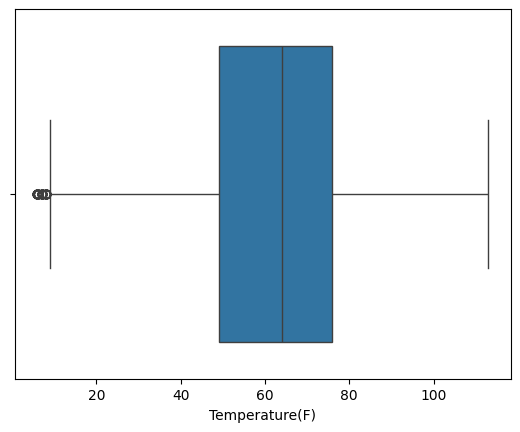

In [40]:
q1 = df_data_handling["Temperature(F)"].quantile(0.25)
q3 = df_data_handling["Temperature(F)"].quantile(0.75)
iqr = q3 - q1
min_value = q1 - 1.5 * iqr
max_value = q3 + 1.5 * iqr
new_df = df_data_handling[df_data_handling["Temperature(F)"]<=max_value]
df_data_handling = new_df[new_df["Temperature(F)"]>=min_value]
sns.boxplot(x="Temperature(F)", data = df_data_handling)
plt.show()

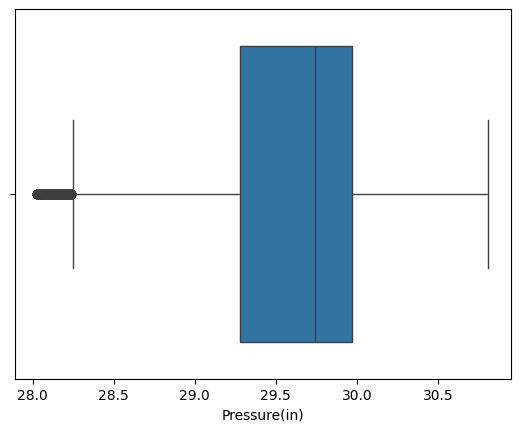

In [41]:
q1 = df_data_handling["Pressure(in)"].quantile(0.25)
q3 = df_data_handling["Pressure(in)"].quantile(0.75)
iqr = q3 - q1
min_value = q1 - 1.5 * iqr
max_value = q3 + 1.5 * iqr
new_df = df_data_handling[df_data_handling["Pressure(in)"]<=max_value]
df_data_handling = new_df[new_df["Pressure(in)"]>=min_value]
sns.boxplot(x="Pressure(in)", data = df_data_handling)
plt.show()

In [42]:
# q1 = df_data_handling["Visibility(mi)"].quantile(0.25)
# q3 = df_data_handling["Visibility(mi)"].quantile(0.75)
# iqr = q3 - q1
# min_value = q1 - 1.5 * iqr
# max_value = q3 + 1.5 * iqr
# new_df = df_data_handling[df_data_handling["Visibility(mi)"]<=max_value]
# df_data_handling = new_df[new_df["Visibility(mi)"]>=min_value]
# sns.boxplot(x="Visibility(mi)", data = df_data_handling)
# plt.show()

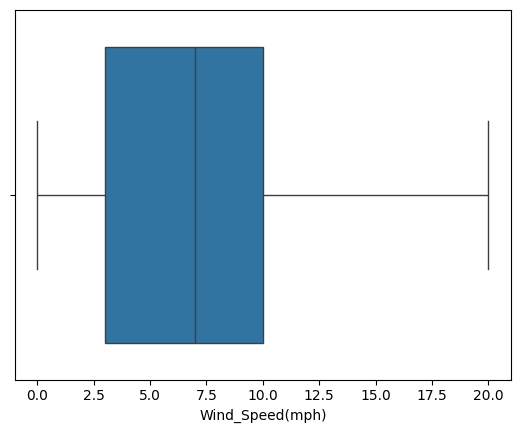

In [43]:
q1 = df_data_handling["Wind_Speed(mph)"].quantile(0.25)
q3 = df_data_handling["Wind_Speed(mph)"].quantile(0.75)
iqr = q3 - q1
min_value = q1 - 1.5 * iqr
max_value = q3 + 1.5 * iqr
new_df = df_data_handling[df_data_handling["Wind_Speed(mph)"]<=max_value]
df_data_handling = new_df[new_df["Wind_Speed(mph)"]>=min_value]
sns.boxplot(x="Wind_Speed(mph)", data = df_data_handling)
plt.show()

In [44]:
# q1 = df_data_handling["Precipitation(in)"].quantile(0.25)
# q3 = df_data_handling["Precipitation(in)"].quantile(0.75)
# iqr = q3 - q1
# min_value = q1 - 1.5 * iqr
# max_value = q3 + 1.5 * iqr
# new_df = df_data_handling[df_data_handling["Precipitation(in)"]<=max_value]
# df_data_handling = new_df[new_df["Precipitation(in)"]>=min_value]
# sns.boxplot(x="Precipitation(in)", data = df_data_handling)
# plt.show()

In [45]:
df_data_handling.shape

(45458, 10)

### Since After removing the outliers from the precipitation and Visibility the value remains constants!

In [46]:
x = df_data_handling.drop(columns="Severity")
y = df_data_handling["Severity"]
ss = StandardScaler()
ss.fit(x)
x = pd.DataFrame(ss.transform(x), columns=x.columns)
x.head(3)

,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Weather_Condition,Precipitation(in)
0,0.234583,-0.786058,0.900348,-1.088462,0.391848,-0.170715,1.437123,-0.893497,-0.145332
1,-0.309405,0.424531,0.945621,0.515520,0.391848,0.257979,-0.001622,-0.893497,-0.145332
2,-0.279753,-0.235791,-1.363275,-0.459875,0.391848,-0.170715,-0.412692,-0.645478,-0.145332


In [47]:
x.shape, y.shape

((45458, 9), (45458,))

In [48]:
x.isnull().sum()

Distance(mi)         0
Temperature(F)       0
Humidity(%)          0
Pressure(in)         0
Visibility(mi)       0
Wind_Direction       0
Wind_Speed(mph)      0
Weather_Condition    0
Precipitation(in)    0
dtype: int64

In [49]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45458 entries, 0 to 45457
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Distance(mi)       45458 non-null  float64
 1   Temperature(F)     45458 non-null  float64
 2   Humidity(%)        45458 non-null  float64
 3   Pressure(in)       45458 non-null  float64
 4   Visibility(mi)     45458 non-null  float64
 5   Wind_Direction     45458 non-null  float64
 6   Wind_Speed(mph)    45458 non-null  float64
 7   Weather_Condition  45458 non-null  float64
 8   Precipitation(in)  45458 non-null  float64
dtypes: float64(9)
memory usage: 3.1 MB


### Train - Test Splitting Done!

In [50]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

### Logistic Regression Model for Classification!

In [51]:
model = LogisticRegression(multi_class="multinomial")
model.fit(x_train,y_train)

LogisticRegression(multi_class='multinomial')

In [52]:
# lr.max_iter

In [53]:
print(mean_squared_error(y_test, model.predict(x_test)))
print(mean_absolute_error(y_test, model.predict(x_test)))
print(root_mean_squared_error(y_test, model.predict(x_test)))

0.2299824021117466
0.18664760228772548
0.47956480491352427


In [54]:
model.score(x_test,y_test)*100 # Accuracy

83.50197976242852

In [124]:
import pickle

# Save the model to a file
with open("model.pkl", "wb") as file:
    pickle.dump(model, file)

print("Model saved as model.pkl")

Model saved as model.pkl


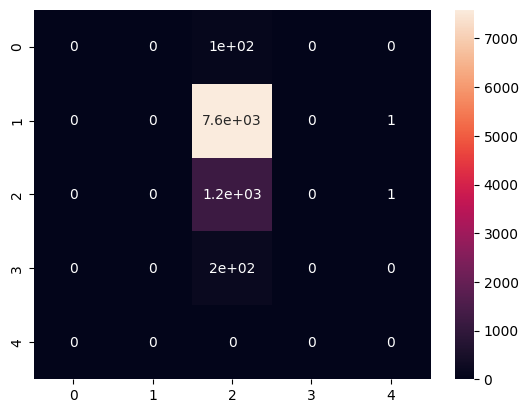

In [57]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
prd = model.predict(x_test) 
# prd_adjusted = prd + 1
cm = confusion_matrix(y_test-1, prd)
sns.heatmap(cm, annot=True)
plt.show()

In [59]:
accuracy_score(y_test, model.predict(x_test))*100

83.50197976242852

### DecisionTreeClassifier!

In [60]:
for i in range(1,20):
    dt2 = DecisionTreeClassifier(max_depth=i)
    dt2.fit(x_train,y_train)
    print(dt2.score(x_train,y_train)*100, dt2.score(x_test,y_test)*100)

83.32508386954848 83.5129784425869
83.32508386954848 83.5129784425869
83.32508386954848 83.5129784425869
83.34983226090304 83.55697316322042
83.38283011604246 83.61196656401232
83.44332618379805 83.46898372195336
83.64681295715779 83.43598768147822
83.88329758565693 83.26000879894413
84.22427542209756 83.13902331720193
84.59275147115437 82.88605367355916
85.19771214871034 82.25912890453145
86.09140405873619 81.68719753629564
87.00984436011659 81.44522657281126
87.95303305285157 81.14826220853497
89.058461200022 80.18037835459745
90.23263487873288 79.05851297844258
91.41780784249023 78.55257369115705
92.62772919760216 77.63968323801144
93.81565198262113 76.71579410470744


In [61]:
dt = DecisionTreeClassifier(max_depth=7)
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=7)

In [62]:
accuracy_score(y_test,dt.predict(x_test))*100

83.4469863616366

In [63]:
print(mean_squared_error(y_test, dt.predict(x_test)))
print(mean_absolute_error(y_test, dt.predict(x_test)))
print(root_mean_squared_error(y_test, dt.predict(x_test)))

0.2302023757149142
0.1870875494940607
0.47979409720724386


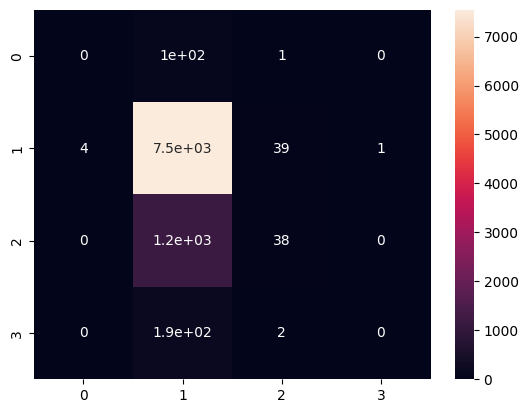

In [64]:

# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
prd = dt.predict(x_test)
cm = confusion_matrix(y_test, prd)
sns.heatmap(data= cm, annot=True)
plt.show()

### K Neighbors Classifiers!

In [65]:
knn = KNeighborsClassifier(n_neighbors=7).fit(x_train, y_train)
accuracy = knn.score(x_test, y_test)
knn_predictions = knn.predict(x_test)
cm = confusion_matrix(y_test, knn_predictions)

In [66]:
accuracy_score(y_test,knn.predict(x_test))*100

82.6440827100748

In [67]:
print(mean_squared_error(y_test, knn.predict(x_test)))
print(mean_absolute_error(y_test, knn.predict(x_test)))
print(root_mean_squared_error(y_test, knn.predict(x_test)))

0.23757149142102948
0.1948966124065112
0.4874130603718262


### K Means Clustering Model!

In [68]:
wcss = []
for i in range(2,21):
    kmn = KMeans(n_clusters=i ,init= 'k-means++')
    kmn.fit(x)
    wcss.append(kmn.inertia_)

In [69]:
# wcss

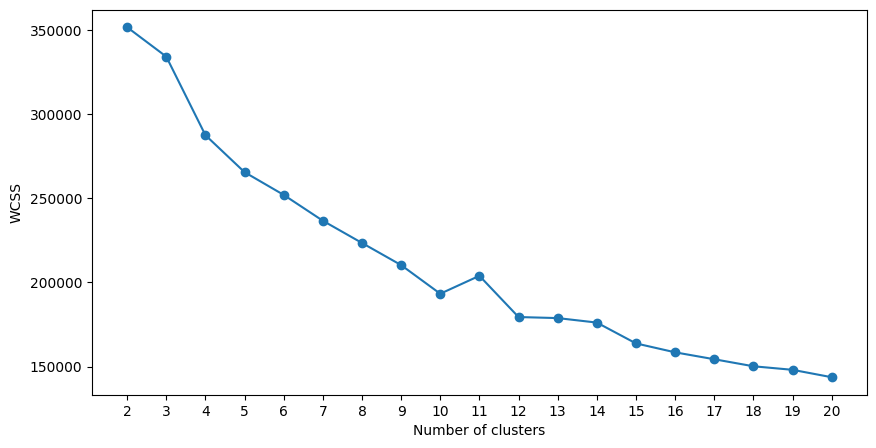

In [70]:
plt.figure(figsize=(10,5))
plt.plot([i for i in range(2,21)], wcss, marker ="o")
plt.xlabel("Number of clusters")
plt.xticks([i for i in range(2,21)])
plt.ylabel("WCSS")
plt.show()

In [99]:
kmn = KMeans(n_clusters=11,init= 'k-means++')
kmn.fit(x)

KMeans(n_clusters=11)

In [100]:
x["predicted_value"]= kmn.fit_predict(x)

In [101]:
accuracy_score(y_test,kmn.fit_predict(x_test))*100

18.653761548614167

In [74]:
x.head()

,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Weather_Condition,Precipitation(in),predicted_value
0,0.234583,-0.786058,0.900348,-1.088462,0.391848,-0.170715,1.437123,-0.893497,-0.145332,3
1,-0.309405,0.424531,0.945621,0.515520,0.391848,0.257979,-0.001622,-0.893497,-0.145332,3
2,-0.279753,-0.235791,-1.363275,-0.459875,0.391848,-0.170715,-0.412692,-0.645478,-0.145332,2
3,-0.309405,0.534584,1.534163,0.732274,-0.813067,-1.313901,-1.440367,-0.893497,-0.145332,0
4,-0.274361,-0.841085,0.357079,0.103687,0.391848,-1.313901,-1.440367,-0.893497,-0.145332,0
